Customers Dataset:
   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166

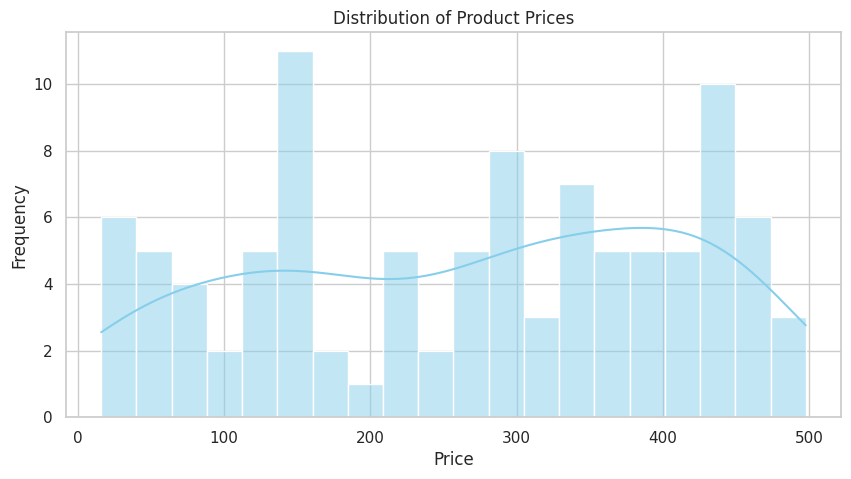

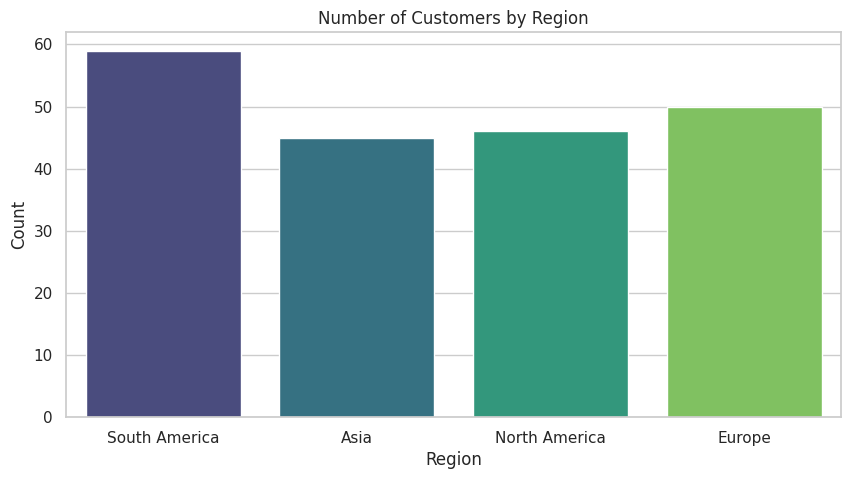

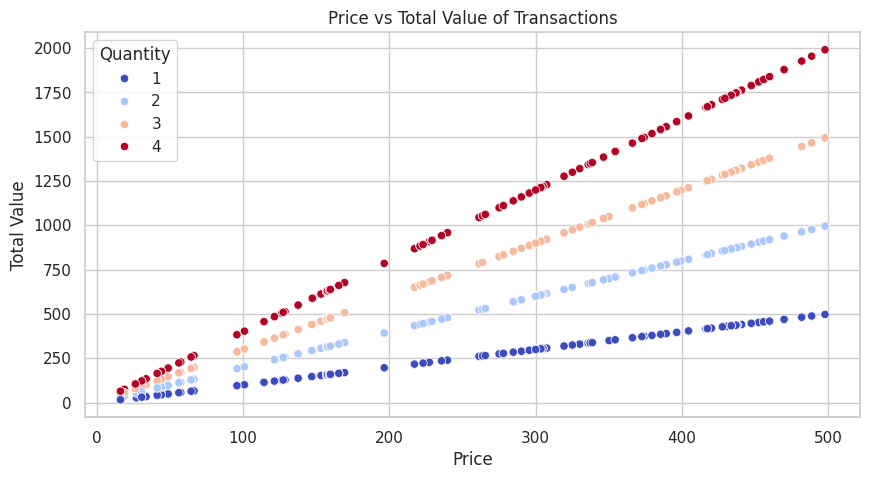

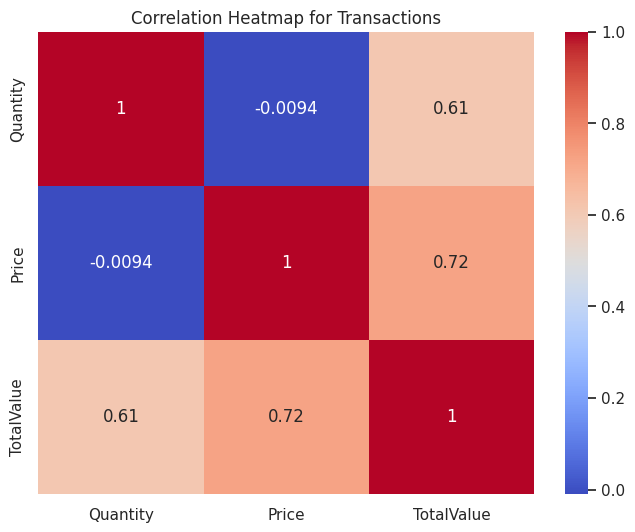


Top-Selling Products:
 ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
Name: Quantity, dtype: int64

Revenue by Region:
 Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64

Customer Behavior by Region:
                AverageTransactionValue  TransactionCount
Region                                                  
Asia                        697.591606               218
Europe                      710.489872               234
North America               624.235246               244
South America               721.554474               304


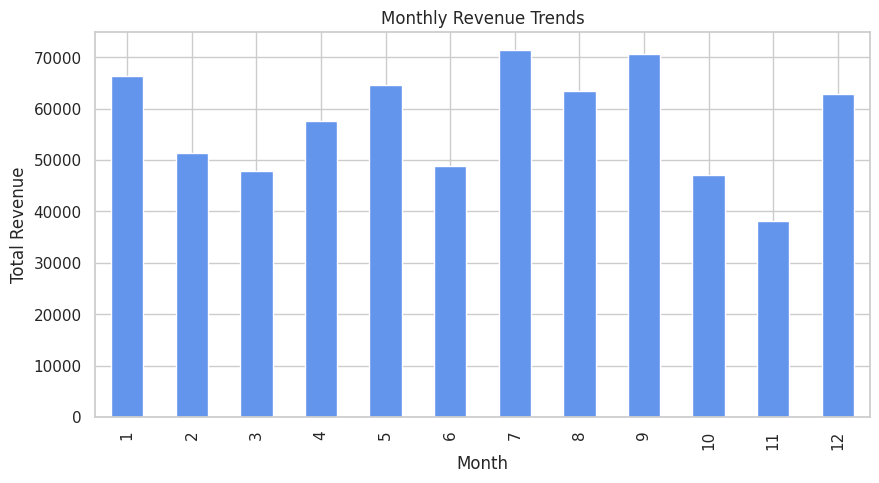


Monthly Revenue Trends:
 Month
1     66376.39
2     51459.27
3     47828.73
4     57519.06
5     64527.74
6     48771.18
7     71366.39
8     63436.74
9     70603.75
10    47063.22
11    38224.37
12    62818.72
Name: TotalValue, dtype: float64


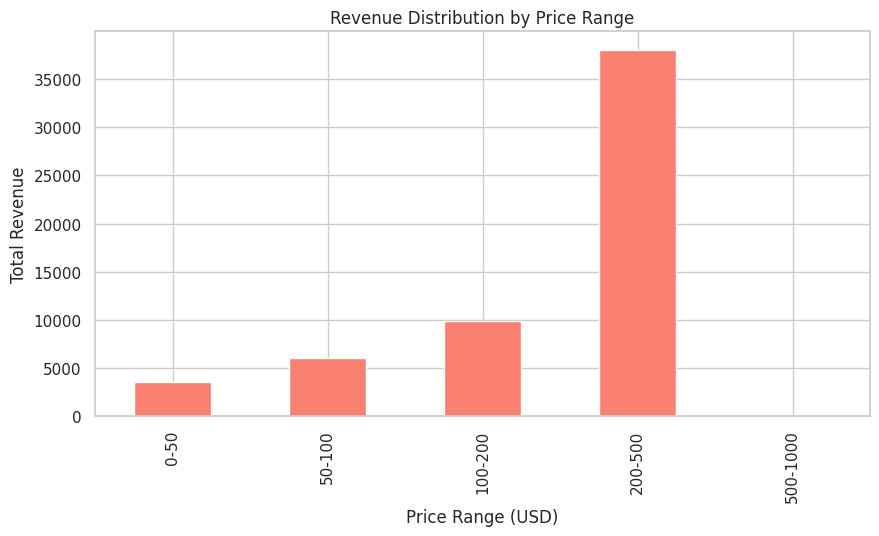


Revenue Distribution by Price Range:
 Price
0-50         3527.22
50-100       6100.24
100-200      9945.91
200-500     38041.98
500-1000        0.00
Name: TotalValue, dtype: float64


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style for plots
sns.set(style="whitegrid")

# Load the datasets (ensure correct file paths)
customers_url = "https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE"
products_url = "https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0"
transactions_url = "https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF"

customers = pd.read_csv(customers_url)
products = pd.read_csv(products_url)
transactions = pd.read_csv(transactions_url)

# Display first few rows to understand the data structure
print("Customers Dataset:\n", customers.head())
print("\nProducts Dataset:\n", products.head())
print("\nTransactions Dataset:\n", transactions.head())

# Step 1: Check for missing values
print("\nMissing values in Customers:\n", customers.isnull().sum())
print("\nMissing values in Products:\n", products.isnull().sum())
print("\nMissing values in Transactions:\n", transactions.isnull().sum())

# Step 2: Data Cleaning
# Convert dates to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], errors='coerce')  # Handle invalid dates
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], errors='coerce')

# Check for duplicates
print("\nDuplicate rows in Customers:", customers.duplicated().sum())
print("Duplicate rows in Products:", products.duplicated().sum())
print("Duplicate rows in Transactions:", transactions.duplicated().sum())

# Remove duplicates if necessary
customers = customers.drop_duplicates()
products = products.drop_duplicates()
transactions = transactions.drop_duplicates()

# Step 3: Basic Descriptive Statistics
print("\nCustomers Summary:\n", customers.describe(include='all'))
print("\nProducts Summary:\n", products.describe(include='all'))
print("\nTransactions Summary:\n", transactions.describe())

# Step 4: Visualizations
# 4.1 Histogram: Product prices
plt.figure(figsize=(10, 5))
sns.histplot(products['Price'], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Product Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# 4.2 Bar Chart: Number of customers by region
plt.figure(figsize=(10, 5))
sns.countplot(data=customers, x='Region', hue='Region', palette="viridis", dodge=False, legend=False)
plt.title("Number of Customers by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()


# 4.3 Scatter Plot: Price vs TotalValue in Transactions
plt.figure(figsize=(10, 5))
sns.scatterplot(data=transactions, x='Price', y='TotalValue', hue='Quantity', palette="coolwarm")
plt.title("Price vs Total Value of Transactions")
plt.xlabel("Price")
plt.ylabel("Total Value")
plt.show()

# 4.4 Correlation Heatmap: Transactions Dataset
plt.figure(figsize=(8, 6))
corr_matrix = transactions[['Quantity', 'Price', 'TotalValue']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Transactions")
plt.show()

# Step 5: Business Insights Example
# 5.1 Identify top-selling products
top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False)
print("\nTop-Selling Products:\n", top_products.head())

# 5.2 Revenue contribution by region
region_revenue = transactions.merge(customers, on='CustomerID').groupby('Region')['TotalValue'].sum()
print("\nRevenue by Region:\n", region_revenue)

# Save results for documentation
region_revenue.to_csv("Revenue_By_Region.csv", index=True)

# 5.3 Insight 3: Customer Behavior by Region
region_behavior = transactions.merge(customers, on='CustomerID').groupby('Region').agg({
    'TotalValue': 'mean',
    'TransactionID': 'count'
}).rename(columns={'TotalValue': 'AverageTransactionValue', 'TransactionID': 'TransactionCount'})
print("\nCustomer Behavior by Region:\n", region_behavior)

# 5.4 Insight 4: Seasonal Trends
transactions['Month'] = transactions['TransactionDate'].dt.month
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()
plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='bar', color="cornflowerblue")
plt.title("Monthly Revenue Trends")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()
print("\nMonthly Revenue Trends:\n", monthly_sales)

# 5.5 Insight 5: Price Sensitivity
price_bins = pd.cut(products['Price'], bins=[0, 50, 100, 200, 500, 1000], labels=['0-50', '50-100', '100-200', '200-500', '500-1000'])
price_distribution = transactions.merge(products, on='ProductID').groupby(price_bins, observed=False)['TotalValue'].sum()
plt.figure(figsize=(10, 5))
price_distribution.plot(kind='bar', color="salmon")
plt.title("Revenue Distribution by Price Range")
plt.xlabel("Price Range (USD)")
plt.ylabel("Total Revenue")
plt.show()
print("\nRevenue Distribution by Price Range:\n", price_distribution)

# Save results for documentation
region_revenue.to_csv("Revenue_By_Region.csv", index=True)
region_behavior.to_csv("Customer_Behavior_By_Region.csv", index=True)

